# Machine Learning 2023-2024 - UMONS
# Exploratory Data Analysis with Pandas (Tutorial)


In this tutorial, we experiment with the library Pandas on the dataset titanic.

**Load necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import Image

**Load a dataframe from an Excel file**

In [2]:
raw_data = pd.read_excel("data/titanic.xls")
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


1.  **pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
2.  **survived:** Outcome of survival (0 = No; 1 = Yes)
3.  **name:** Name of passenger
4.  **sex:** Sex of the passenger
5.  **age:** Age of the passenger (Some entries contain NaN)
6.  **sibsp:** Number of siblings and spouses of the passenger aboard
7.  **parch:** Number of parents and children of the passenger aboard
8.  **ticket:** Ticket number of the passenger
9.  **fare:** Fare paid by the passenger
10. **cabin:** Cabin number of the passenger (Some entries contain NaN)
11. **embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
12. ...

## Overview of the dataframe

**The shape represents the number of rows and columns in the dataframe**

In [3]:
raw_data.shape

(1309, 14)

**Get column names**

In [4]:
raw_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

**Get data types of each column**

In [5]:
raw_data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**Get dataframe technical informations**

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**Get Dataframe summary statistics for numerical variables**

In [7]:
with pd.option_context('display.precision', 1): # We only display one decimal place
    display(raw_data.describe())

,pclass,survived,age,sibsp,parch,fare,body
count,1309.0,1309.0,1046.0,1309.0,1309.0,1308.0,121.0
mean,2.3,0.4,29.9,0.5,0.4,33.3,160.8
std,0.8,0.5,14.4,1.0,0.9,51.8,97.7
min,1.0,0.0,0.2,0.0,0.0,0.0,1.0
25%,2.0,0.0,21.0,0.0,0.0,7.9,72.0
50%,3.0,0.0,28.0,0.0,0.0,14.5,155.0
75%,3.0,1.0,39.0,1.0,0.0,31.3,256.0
max,3.0,1.0,80.0,8.0,9.0,512.3,328.0


**Set a chosen column as index**

In [8]:
raw_data = raw_data.set_index("name")
raw_data

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
"Zabour, Miss. Thamine",3,0,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
"Zakarian, Mr. Mapriededer",3,0,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN


**Get the name of columns in the index**

In [9]:
raw_data.index.names

FrozenList(['name'])

**Remov all columns from the index**

In [10]:
raw_data = raw_data.reset_index()

## Data cleaning

**Check for missing values**

In [11]:
raw_data.isna()

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


**Count the number of missing values per column.**

In [12]:
raw_data.isna().sum()

name            0
pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

**Count the number of non-missing values per column.**

In [13]:
raw_data.notna().sum()

name         1309
pclass       1309
survived     1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

**Get the proportion of missing values per column, and sort them in descending order.**

In [14]:
raw_data.isna().mean().sort_values(ascending=False)

body         0.907563
cabin        0.774637
boat         0.628724
home.dest    0.430863
age          0.200917
embarked     0.001528
fare         0.000764
name         0.000000
pclass       0.000000
survived     0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
dtype: float64

**Create a heatmap of missing values per column.**

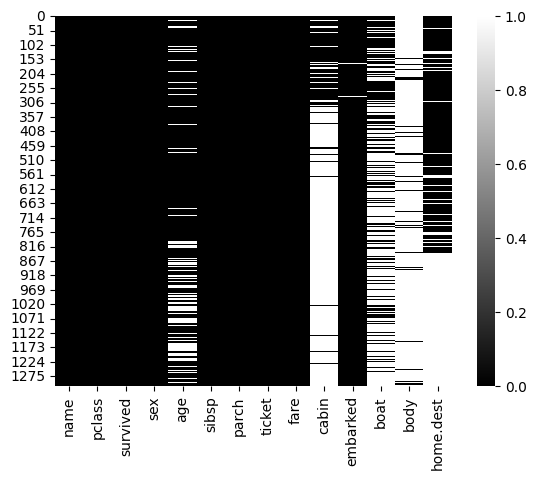

In [15]:
sns.heatmap(raw_data.isna(), cmap='gray');

### Dealing with missing values

- Remove missing values:
    - Remove rows/columns with missing columns
    - Drop rows/columns by percentage of missing values  
    - See `pd.dropna(axis= , thresh= )`
- Impute missing values:
    - Filling with generic values
    - Filling with central tendencies
    - See `pd.fillna()`, `pd.bfill()`, `pd.ffill()`, etc



**Check the missing values for a specific column.**

In [16]:
raw_data["embarked"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: embarked, Length: 1309, dtype: bool

**Count the number of missing values for a specific column**

In [17]:
raw_data["embarked"].isna().sum()  # only 2 missing values

2

**Count the occurrences of a categorical variable, including missing values.**

In [18]:
raw_data["embarked"].value_counts(dropna=False)

embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

**Replace missing values with the most represented class.**

In [19]:
raw_data["embarked"].fillna("S", inplace=True)

**Drop specified columns.**

In [20]:
data = raw_data.drop(
    ["name", "sibsp", "parch", "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"],
    axis=1,
)
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [21]:
data["age"].isna().sum()

263

**Drop all rows that contain a missing value.**

In [22]:
data.dropna(axis=0, inplace=True)
data.shape

(1046, 4)

**Assert no missing values remain in a chosen column.**

In [23]:
assert data["age"].notna().all()

**Change data type of a chosen column.**

In [24]:
data["sex"] = data["sex"].astype("category")
data["pclass"] = data["pclass"].astype("category")

**Concatenate rows into a new Dataframe.**

In [25]:
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1, data2], axis=0, ignore_index=True)
conc_data_row

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
5,3,0,male,45.5000
6,3,0,female,14.5000
7,3,0,male,26.5000
8,3,0,male,27.0000
9,3,0,male,29.0000


**Concatenate columns into a new Dataframe.**

In [26]:
data1 = data["age"]
data2 = data["sex"]
conc_data_col = pd.concat([data1, data2], axis=1)
conc_data_col

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
...,...,...
1301,45.5000,male
1304,14.5000,female
1306,26.5000,male
1307,27.0000,male


## Indexing and filtering

In [27]:
# Selecting one column
data["survived"]
# Or equivalently
data.survived

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, Length: 1046, dtype: int64

In [28]:
# Selecting two columns
data[["survived", "pclass"]]

,survived,pclass
0,1,1
1,1,1
2,0,1
3,0,1
4,0,1
...,...,...
1301,0,3
1304,0,3
1306,0,3
1307,0,3


**Select 10 first rows of a chosen column.**

In [29]:
# Using square brackets
data["age"][0:9]
# Using loc accessor (preferred)
data.loc[0:9, "survived"]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
Name: age, dtype: float64

In [32]:
data.loc[0:9, ["age", "sex"]]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male
6,63.0000,female
7,39.0000,male
8,53.0000,female
9,71.0000,male


In [33]:
# Using row and column indices.
data.iloc[0:10, 0:2]

,pclass,survived
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
5,1,1
6,1,1
7,1,0
8,1,1
9,1,0


**Filter a Dataframe based on a condition**

In [34]:
# Creating boolean series
mask = data.age > 70
data[mask]
data[data.age > 70]

,pclass,survived,sex,age
9,1,0,male,71.0
14,1,1,male,80.0
61,1,1,female,76.0
135,1,0,male,71.0
727,3,0,male,70.5
1235,3,0,male,74.0


In [35]:
first_mask = data.age > 70
second_mask = data.survived == 1
data[first_mask & second_mask]

#Note that you must use '&', '|' instead of 'and', 'or' when filtering a Dataframe.

,pclass,survived,sex,age
14,1,1,male,80.0
61,1,1,female,76.0


**Apply a function to each row of a Dataframe.**

In [37]:
def div(n):
    return n / 2

data.age.apply(div)

0       14.50000
1        0.45835
2        1.00000
3       15.00000
4       12.50000
          ...   
1301    22.75000
1304     7.25000
1306    13.25000
1307    13.50000
1308    14.50000
Name: age, Length: 1046, dtype: float64

In [38]:
data.age.apply(lambda n: n / 2)

0       14.50000
1        0.45835
2        1.00000
3       15.00000
4       12.50000
          ...   
1301    22.75000
1304     7.25000
1306    13.25000
1307    13.50000
1308    14.50000
Name: age, Length: 1046, dtype: float64

# Data visualization and summaries

**Create a histogram of a chosen variable.**

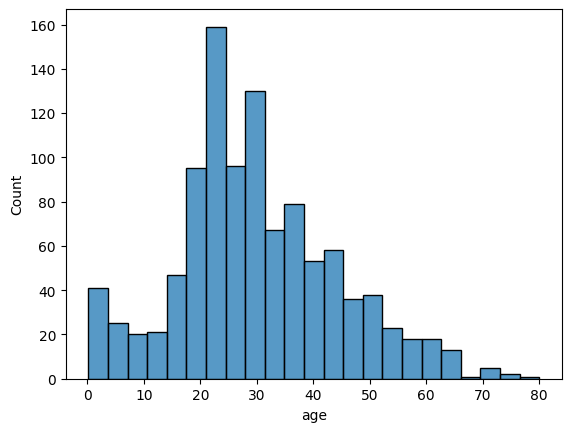

In [39]:
sns.histplot(x='age', data=data);

**Create a barplot for a chosen categorical variable.**

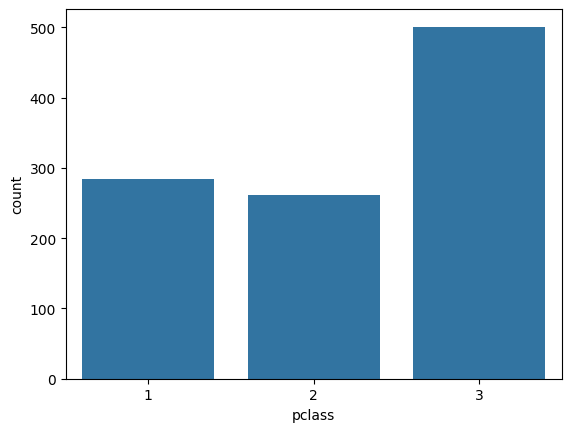

In [40]:
sns.countplot(x='pclass', data=data);

**Create a barplot a of chosen variable, but first group observations according to a second variable. The barplots appear on the same figure.**

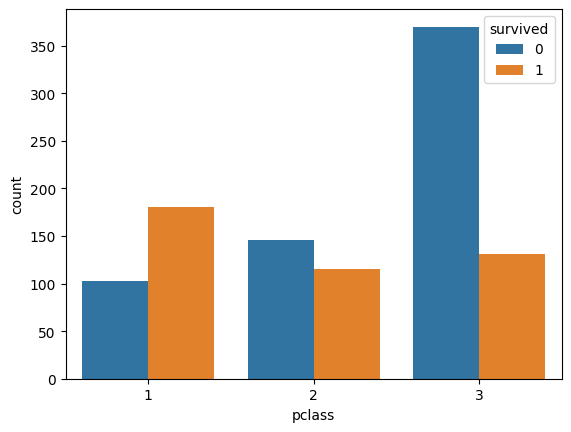

In [41]:
sns.countplot(x="pclass", hue="survived", data=data);

# Pandas Series and DataFrame

It is important to distinguish Pandas Series and DataFrame types:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


In [42]:
print(type(raw_data["age"]))

<class 'pandas.core.series.Series'>


In [43]:
print(type(raw_data[["age"]]))

<class 'pandas.core.frame.DataFrame'>


In [44]:
print(type(raw_data[["age", "sex"]]))

<class 'pandas.core.frame.DataFrame'>


In [45]:
raw_data.index

RangeIndex(start=0, stop=1309, step=1)

**Create a barplot of a chosen variable, but first group observations according to a second variable.**

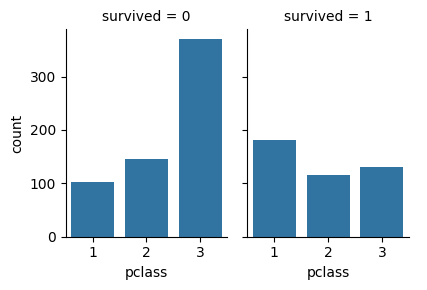

In [46]:
sns.catplot(x="pclass", col="survived", data=data, kind="count", height=3, aspect=0.7);

**Create a scatterplot between two continuous variables.**

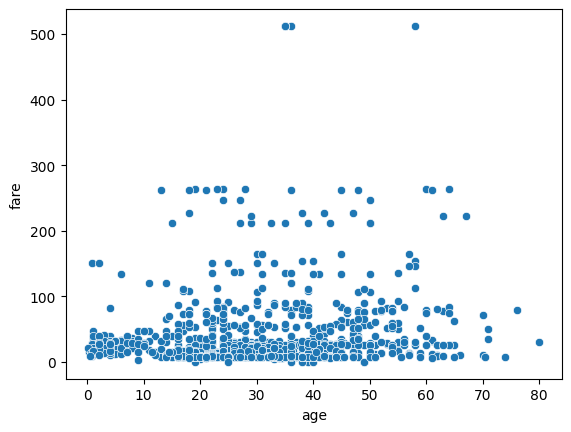

In [47]:
sns.scatterplot(x='age', y='fare', data=raw_data);

**Create a boxplot of a continuous variable.**

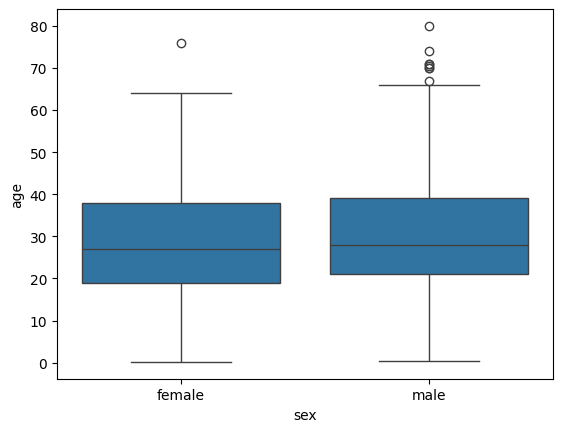

In [48]:
sns.boxplot(x='sex', y='age', data=data);

**Create a density plot of a chosen continuous variable.**

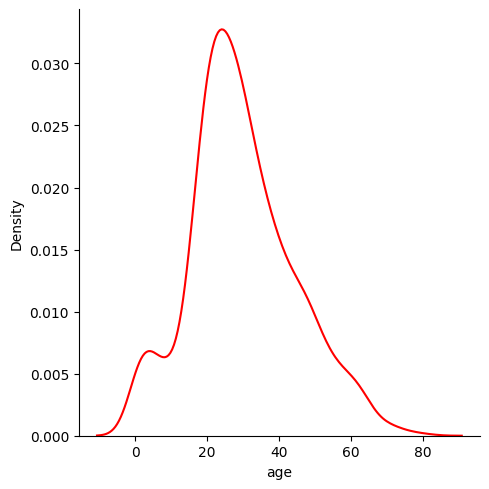

In [49]:
sns.displot(x='age', color='red', kind='kde', data=data);

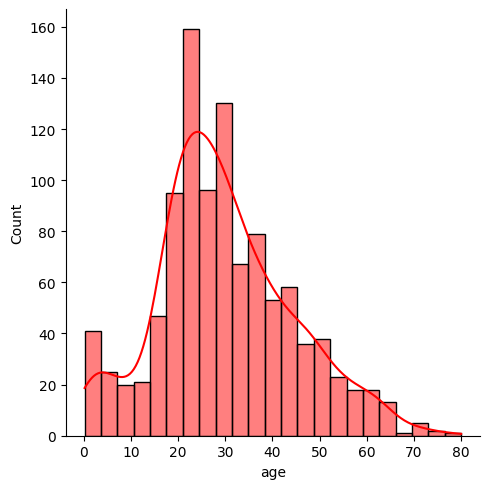

In [50]:
sns.displot(x='age', color='red', data=data, kde=True);

**Group observations according to a criterion, and compute their mean.**

In [51]:
data.groupby(["sex"])[['survived', 'age']].mean()

,survived,age
sex,,
female,0.752577,28.687071
male,0.205167,30.585233


In [52]:
data.groupby(["sex", "pclass"])[['survived', 'age']].mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

**Map values of a column.**

In [53]:
def category_ages(age):
    if age <= 20:
        return "<20 ans"
    elif (age > 20) & (age <= 30):
        return "20-30 ans"
    elif (age > 30) & (age <= 40):
        return "30-40 ans"
    else:
        return "+40 ans"


data["cat_ages"] = data["age"].map(category_ages)
data.head()

,pclass,survived,sex,age,cat_ages
0,1,1,female,29.0000,20-30 ans
1,1,1,male,0.9167,<20 ans
2,1,0,female,2.0000,<20 ans
3,1,0,male,30.0000,20-30 ans
4,1,0,female,25.0000,20-30 ans


**Create a column for the size of the family.**

In [54]:
raw_data["familysize"] = raw_data["sibsp"] + raw_data["parch"] + 1
raw_data.head(10)

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,familysize
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
5,"Anderson, Mr. Harry",1,1,male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,"Andrews, Miss. Kornelia Theodosia",1,1,female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2
7,"Andrews, Mr. Thomas Jr",1,0,male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,1,female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3
9,"Artagaveytia, Mr. Ramon",1,0,male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1


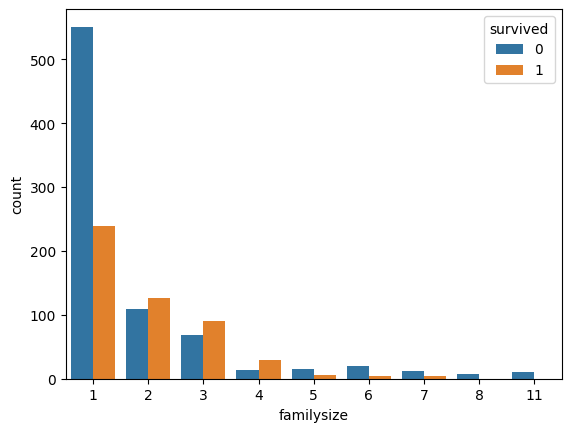

In [55]:
sns.countplot(x="familysize", hue="survived", data=raw_data);